# Principe

Le tri de Shell ... 

Nous allons l'illustrer en triant le tableau TAB ci-dessous.

In [1]:
TAB = [ 5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1 ]
print(TAB)

In [2]:
def afficher_parties(T,h):
    N = len(T)
    for i in range(h):
        print(T[slice(i,N,h)])
        
afficher_parties(TAB,4)

# le h-tri



In [3]:
def h_tri(T,h):
    N = len(T)
    for j in range(1,N):
        tmp = T[j]
        
        i = j
        while i > h-1 and tmp < T[i-h]:
            T[i] = T[i-h]
            i -= h
        T[i] = tmp

In [4]:
T = TAB.copy()
print(T)
h_tri(T,4)
print(T)
afficher_parties(T,4)

# Boucle externe

valeurs de h décroissantes

In [5]:
def tri_de_shell(T):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:
        h_tri(T,h)
        h = h//3     # division entière

In [6]:
T = TAB.copy()
tri_de_shell(T)
print(T)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


# Complexité

Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'écritures dans le tableau (il n'y a pas d'échanges dans ce tri). 

In [7]:
def tri_de_shell_cnt(T):
    nb_comparaisons = nb_ecritures = 0

    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:
        
        for j in range(1,N):
            tmp = T[j]
            i = j
            nb_comparaisons += 1
            while i > h-1 and tmp < T[i-h]:
                nb_comparaisons += 1
                T[i] = T[i-h]
                nb_ecritures += 1
                i -= h
            T[i] = tmp
            nb_ecritures += 1
        
        h = h//3   
      
    return nb_comparaisons, nb_ecritures

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

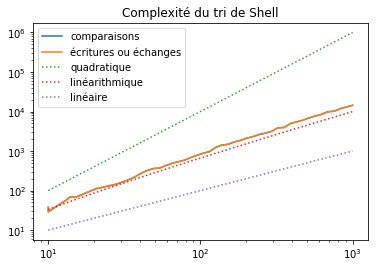

    N |     Comp. |      Ech.
-------------------------------
   10 |        38 |        38
   19 |        98 |        98
   37 |       220 |       220
   71 |       535 |       535
  138 |      1414 |      1414
  268 |      2848 |      2848
  517 |      6877 |      6877
 1000 |     14362 |     14362


In [16]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri de Shell")

Notons que 

* le nombre de comparaisons et d'écritures est égal 
* leur complexité est proche de $\Theta(n.log(n))$ pour trier $n$ éléments. 
* mais le nombre exact de comparaisons varie, sans doute en fonction du contenu du tableau

Vérifions cette dernière hypothèse en triant un tableau déjà trié

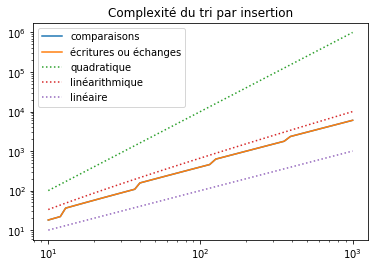

    N |     Comp. |      Ech.
-------------------------------
   10 |        18 |        18
   19 |        54 |        54
   37 |       108 |       108
   71 |       280 |       280
  138 |       685 |       685
  268 |      1335 |      1335
  517 |      3096 |      3096
 1000 |      5994 |      5994


In [9]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_trie, 
                      "tri par insertion")

Logiquement de l'ordre de $\Theta(n.log_3(n))$. 

Observons maintenant le cas inverse d'une entrée triée à l'envers

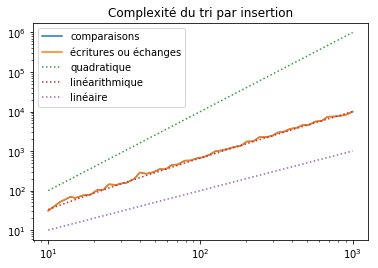

    N |     Comp. |      Ech.
-------------------------------
   10 |        31 |        31
   19 |        79 |        79
   37 |       202 |       202
   71 |       457 |       457
  138 |      1040 |      1040
  268 |      2257 |      2257
  517 |      4608 |      4608
 1000 |      9914 |      9914


In [10]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_de_shell_cnt, 
                      hlp.tableau_trie_inverse, 
                      "tri par insertion")

Notons que ce n'est pas le pire cas. Les h parties sont bien équilibrées, ce qui est favorable. Déterminer le pire des cas est sensiblement plus complexe (et hors sujet pour ce cours)

Le tri de Shell est ...

# Stabilité

Le tri de Shell n'est pas stable. 

Pour l'illuster, il faut réécrire le tri avec une fonction de comparaison générique. 


Le tri n'est pas stable


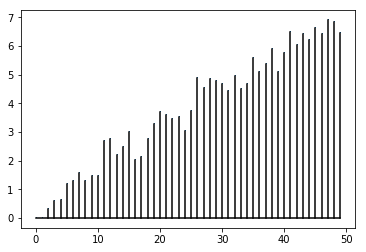

In [11]:
def tri_de_shell_generique(T,plus_petit):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1       
    while h >= 1:      
        for j in range(1,N):
            tmp = T[j]
            i = j
            while i > h-1 and plus_petit(tmp,T[i-h]):
                T[i] = T[i-h]
                i -= h
            T[i] = tmp
        h = h//3   
        
hlp.test_stabilite(tri_de_shell_generique)

# Visualisation

Finalement, visualisons graphiquement le tri de Shell après chaque h_tri.

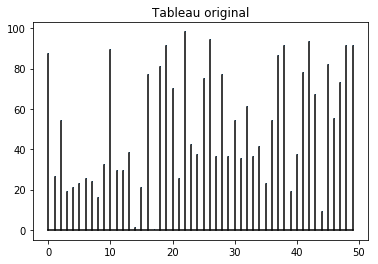

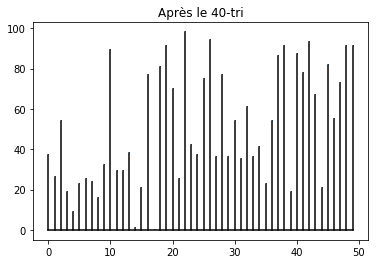

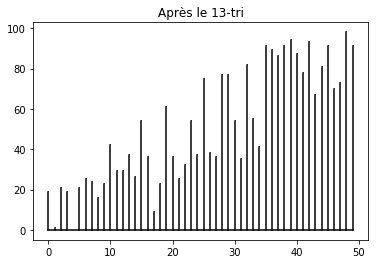

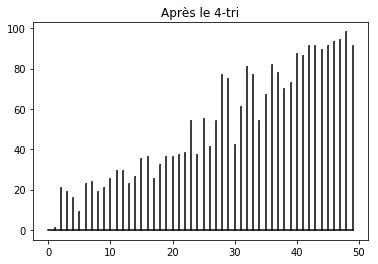

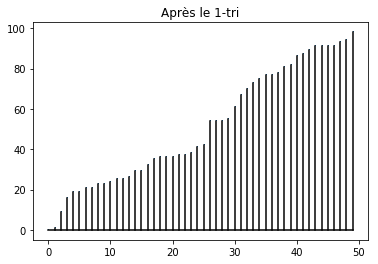

In [12]:
from include.helpers import visualisation_tri_de_shell
visualisation_tri_de_shell()